## ML pipeline for sales prediction through Random forest regressor

### Prototype ML Model

#### Import the Data

In [106]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt

In [107]:
train=pd.read_csv('train_v9rqX0R.csv')

#### Data Preprocessing

In [108]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [109]:
train.Item_Weight.fillna(train.Item_Weight.mean(),inplace=True)
train.Outlet_Size.fillna(train.Outlet_Size.mode()[0],inplace=True)

In [110]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [112]:
import category_encoders as en

In [113]:
Ohe = en.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)

In [114]:
train=Ohe.fit_transform(train)

In [115]:
train=train.drop(columns=['Item_Identifier'])

In [116]:
train.head(6)

,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,...,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,9.300,1,0,0,0,0,0.016047,1,0,0,...,0,0,1,0,0,1,0,0,0,3735.1380
1,5.920,0,1,0,0,0,0.019278,0,1,0,...,0,0,0,1,0,0,1,0,0,443.4228
2,17.500,1,0,0,0,0,0.016760,0,0,1,...,0,0,1,0,0,1,0,0,0,2097.2700
3,19.200,0,1,0,0,0,0.000000,0,0,0,...,0,0,0,1,0,0,0,1,0,732.3800
4,8.930,1,0,0,0,0,0.000000,0,0,0,...,1,0,0,1,0,1,0,0,0,994.7052
5,10.395,0,1,0,0,0,0.000000,0,0,0,...,0,0,0,1,0,0,1,0,0,556.6088


In [117]:
X=train.loc[:,train.columns!='Item_Outlet_Sales']

In [118]:
Y=train['Item_Outlet_Sales']

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
scaler=StandardScaler().fit(X)

In [121]:
X_s=pd.DataFrame(scaler.transform(X),columns=X.columns)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(X_s,Y,test_size=0.2,random_state=92)

#### Build the Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [125]:
RF_model1=RandomForestRegressor()

In [126]:
RF_model1.fit(X_train,Y_train)

RandomForestRegressor()

In [127]:
from sklearn.metrics import r2_score,mean_squared_error

In [128]:
r2_score(Y_test,RF_model1.predict(X_test))

0.5685142732478393

In [129]:
mean_squared_error(Y_test,RF_model1.predict(X_test))

1309081.772415857

In [130]:
imp_feat=pd.Series(RF_model1.feature_importances_,index = X.columns)

<AxesSubplot:>

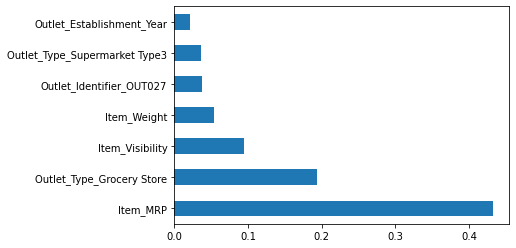

In [131]:
imp_feat.nlargest(7).plot(kind='barh')

In [132]:
X_train.head()

,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,...,Outlet_Size_Medium,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier 2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
5476,4.035383e-14,0.821455,-0.716086,-0.115395,-0.196224,-0.117977,0.004257,-0.294922,-0.234708,4.365102,...,-1.251866,-0.350395,1.602840,1.602840,-0.804732,-0.696678,-1.375891,-0.349551,2.621031,-0.351028
1154,4.035383e-14,-1.217352,1.396480,-0.115395,-0.196224,-0.117977,-0.147099,-0.294922,-0.234708,-0.229090,...,0.798807,-0.350395,-0.623893,-0.623893,1.242650,-0.696678,-1.375891,-0.349551,-0.381529,2.848773
2675,4.035383e-14,-1.217352,-0.716086,-0.115395,5.096226,-0.117977,2.241258,-0.294922,-0.234708,-0.229090,...,0.798807,-0.350395,-0.623893,-0.623893,1.242650,-0.696678,-1.375891,-0.349551,-0.381529,2.848773
3320,4.035383e-14,0.821455,-0.716086,-0.115395,-0.196224,-0.117977,-0.780896,-0.294922,-0.234708,-0.229090,...,0.798807,-0.350395,-0.623893,-0.623893,1.242650,-0.696678,-1.375891,-0.349551,-0.381529,2.848773
4831,-1.532853e+00,0.821455,-0.716086,-0.115395,-0.196224,-0.117977,-0.987284,-0.294922,-0.234708,-0.229090,...,0.798807,-0.350395,-0.623893,-0.623893,-0.804732,1.435383,0.726802,-0.349551,-0.381529,-0.351028


#### Build the model Using most significant features

In [133]:
X_train_imp = X_train[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

In [134]:
X_test_imp = X_test[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

In [135]:
RF_model2=RandomForestRegressor()

In [136]:
RF_model2.fit(X_train_imp,Y_train)

RandomForestRegressor()

In [137]:
r2_score(Y_test,RF_model2.predict(X_test_imp))

0.5561211016912422

In [138]:
mean_squared_error(Y_test,RF_model2.predict(X_test_imp))

1346681.335926987

### Build the ML  Pipeline

In [148]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [149]:
Transformer_1 = ColumnTransformer(remainder='passthrough',
                                transformers=[('drop_columns', 'drop', ['Item_Identifier',
                                                                        'Outlet_Identifier',
                                                                        'Item_Fat_Content',
                                                                        'Item_Type',
                                                                        'Outlet_Identifier',
                                                                        'Outlet_Size',
                                                                        'Outlet_Location_Type',
                                                                        'Outlet_Type'
                                                                       ]),
                                              ('impute_item_weight', SimpleImputer(strategy='mean'), ['Item_Weight']),
                                              ])

In [150]:
model_pipeline = Pipeline(steps=[('Transformer_1',data_preprocessing),
                                 ('Transformer_2',StandardScaler()),
                                 ('Estimator', RandomForestRegressor(max_depth=10,random_state=2))
                                 ])

### Train the Model Using Pipeline

In [151]:
train=pd.read_csv('train_v9rqX0R.csv')

In [152]:
X=train.loc[:,train.columns!='Item_Outlet_Sales']
Y=train['Item_Outlet_Sales']

In [153]:
model_pipeline.fit(X,Y)

Pipeline(steps=[('Transformer_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('drop_columns', 'drop',
                                                  ['Item_Identifier',
                                                   'Outlet_Identifier',
                                                   'Item_Fat_Content',
                                                   'Item_Type',
                                                   'Outlet_Identifier',
                                                   'Outlet_Size',
                                                   'Outlet_Location_Type',
                                                   'Outlet_Type']),
                                                 ('impute_item_weight',
                                                  SimpleImputer(),
                                                  ['Item_Weight'])])),
                ('Transformer_2', StandardScaler()),
           

### Make Predictions through Pipeline 

In [156]:
test=pd.read_csv('test_AbJTz2l.csv')

In [157]:
model_pipeline.predict(test)

array([1685.82063949, 1352.56787032,  824.93107475, ..., 1879.36721036,
       4055.74054457, 1300.02755312])